# Exploratory Data Analysis #

In [41]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
from pathlib import Path

# Visualizations Libraries
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [42]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [43]:
df = pd.read_csv('Intermediate/output.csv')
df.set_index('MonitoringLocationIdentifier', inplace=True)

# Data Visualization #

I can explore the relationships between the features. But first, I would like to vizualize each feature.
My target variable is E. coli.

array([[<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'Temperature, water'}>,
        <Axes: title={'center': 'Barometric pressure'}>],
       [<Axes: title={'center': 'Escherichia coli'}>,
        <Axes: title={'center': 'Temperature, air'}>,
        <Axes: title={'center': 'Specific conductance'}>],
       [<Axes: title={'center': 'Organic carbon'}>,
        <Axes: title={'center': 'Stream flow, instantaneous'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Hardness, Ca, Mg'}>,
        <Axes: title={'center': 'Phosphorus'}>,
        <Axes: title={'center': 'Total suspended solids'}>]], dtype=object)

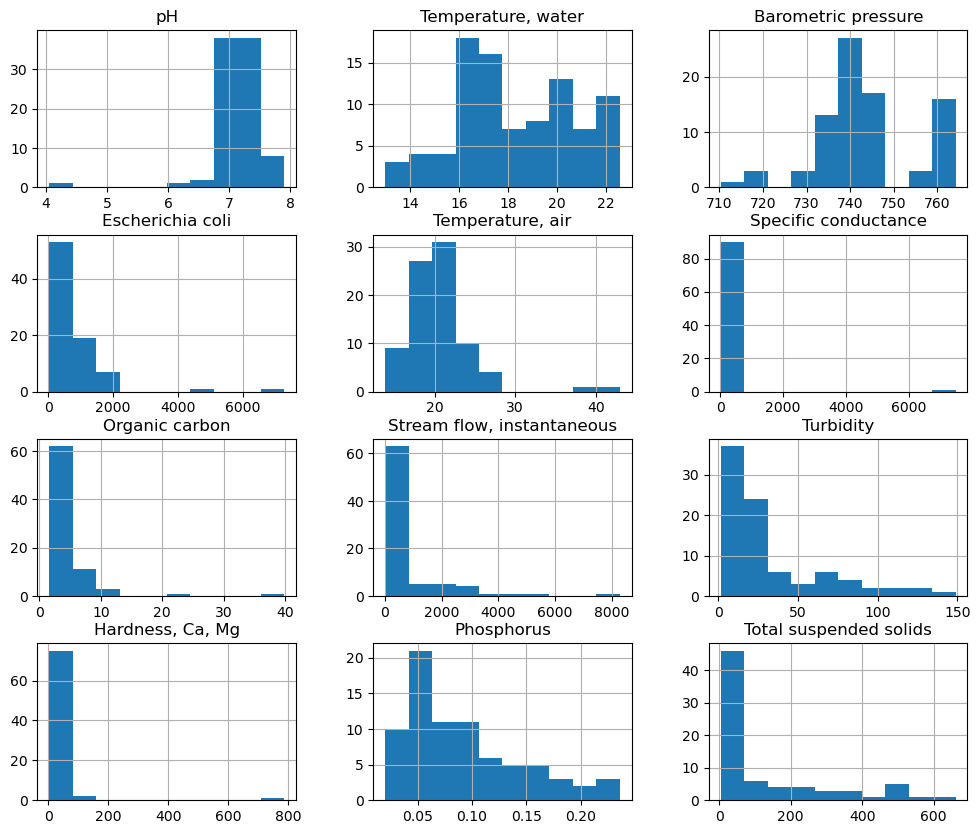

In [46]:
df.hist(figsize=(12, 10))

There are large skewness in all of the features except barometric pressure. Mostly right skewness. Because of the skewness, I will use Spearman's method for df.corr() instead of the default method which relies on normal distribution.

# Drop Outliers #

I will drop the top  10% from each set and set those values equal to the median.

In [50]:
for col in df:
    df.loc[df[col].nlargest(10).index, col] = df[col].mean()

In [51]:
df.loc[df['pH'].nsmallest().index, 'pH'] = df['pH'].mean()

array([[<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'Temperature, water'}>,
        <Axes: title={'center': 'Barometric pressure'}>],
       [<Axes: title={'center': 'Escherichia coli'}>,
        <Axes: title={'center': 'Temperature, air'}>,
        <Axes: title={'center': 'Specific conductance'}>],
       [<Axes: title={'center': 'Organic carbon'}>,
        <Axes: title={'center': 'Stream flow, instantaneous'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Hardness, Ca, Mg'}>,
        <Axes: title={'center': 'Phosphorus'}>,
        <Axes: title={'center': 'Total suspended solids'}>]], dtype=object)

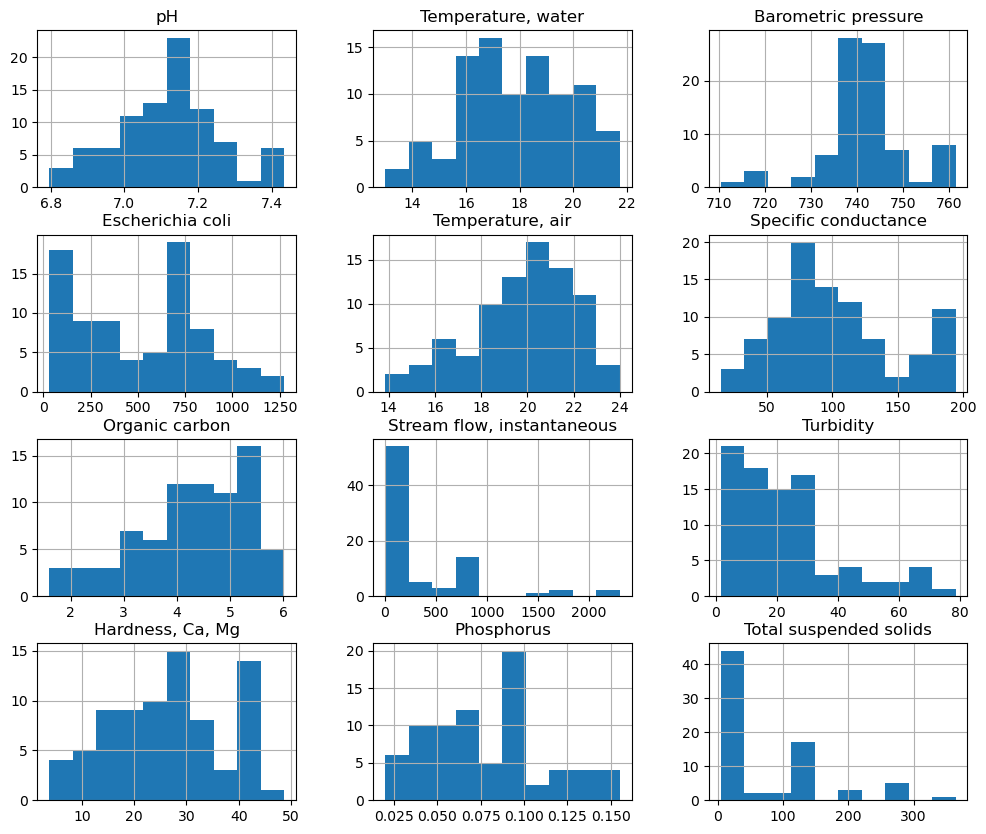

In [52]:
df.hist(figsize=(12, 10))

In [53]:
cor = df.corr(method = 'spearman')
cor

pH  Temperature, water  Barometric pressure  \
pH                          1.000000            0.047875             0.294278   
Temperature, water          0.047875            1.000000             0.323846   
Barometric pressure         0.294278            0.323846             1.000000   
Escherichia coli           -0.124466           -0.126804            -0.392999   
Temperature, air           -0.206128            0.568268             0.040172   
Specific conductance        0.482597            0.194801             0.275290   
Organic carbon              0.036908            0.339071             0.101592   
Stream flow, instantaneous  0.138652            0.362868             0.662224   
Turbidity                  -0.149848            0.123326            -0.245933   
Hardness, Ca, Mg            0.449494            0.255094             0.311998   
Phosphorus                 -0.299927            0.195240            -0.205313   
Total suspended solids     -0.086431           -0.019634            -0.439135   

                            Escherichia coli  Temperature, air  \
pH                                 -0.124466         -0.206128   
Temperature, water                 -0.126804          0.568268   
Barometric pressure                -0.392999          0.040172   
Escherichia coli                    1.000000          0.193621   
Temperature, air                    0.193621          1.000000   
Specific conductance               -0.116927         -0.128562   
Organic carbon                     -0.047275          0.183567   
Stream flow, instantaneous         -0.473988          0.010763   
Turbidity                           0.500402          0.230991   
Hardness, Ca, Mg                   -0.112869         -0.066394   
Phosphorus                          0.385570          0.177067   
Total suspended solids              0.627180          0.158183   

                            Specific conductance  Organic carbon  \
pH                                      0.482597        0.036908   
Temperature, water                      0.194801        0.339071   
Barometric pressure                     0.275290        0.101592   
Escherichia coli                       -0.116927       -0.047275   
Temperature, air                       -0.128562        0.183567   
Specific conductance                    1.000000        0.495249   
Organic carbon                          0.495249        1.000000   
Stream flow, instantaneous              0.178291       -0.059494   
Turbidity                              -0.149164        0.162486   
Hardness, Ca, Mg                        0.949251        0.453050   
Phosphorus                              0.099956        0.446306   
Total suspended solids                  0.008379        0.186246   

                            Stream flow, instantaneous  Turbidity  \
pH                                            0.138652  -0.149848   
Temperature, water                            0.362868   0.123326   
Barometric pressure                           0.662224  -0.245933   
Escherichia coli                             -0.473988   0.500402   
Temperature, air                              0.010763   0.230991   
Specific conductance                          0.178291  -0.149164   
Organic carbon                               -0.059494   0.162486   
Stream flow, instantaneous                    1.000000  -0.241527   
Turbidity                                    -0.241527   1.000000   
Hardness, Ca, Mg                              0.292629   0.045672   
Phosphorus                                   -0.315687   0.624363   
Total suspended solids                       -0.589720   0.932393   

                            Hardness, Ca, Mg  Phosphorus  \
pH                                  0.449494   -0.299927   
Temperature, water                  0.255094    0.195240   
Barometric pressure                 0.311998   -0.205313   
Escherichia coli                   -0.112869    0.385570   
Temperature, air                   -0.

There are some noticable correlations to explore.

I will create a column as a flag to see if our target variable (E. coli) is within acceptable water quality limits. Beacause the mean is greater than the standard and there's a large variance, I'd assume more than half will raise a flag.

In [56]:
def ecoli_label(ecoli):
   if ecoli >= 410:
      return 1
   return 0

In [57]:
df['Escherichia coli Limit Reached'] = df['Escherichia coli'].apply(ecoli_label)

In [70]:
df['Escherichia coli Limit Reached'].value_counts()

Escherichia coli Limit Reached
0    47
1    44
Name: count, dtype: int64

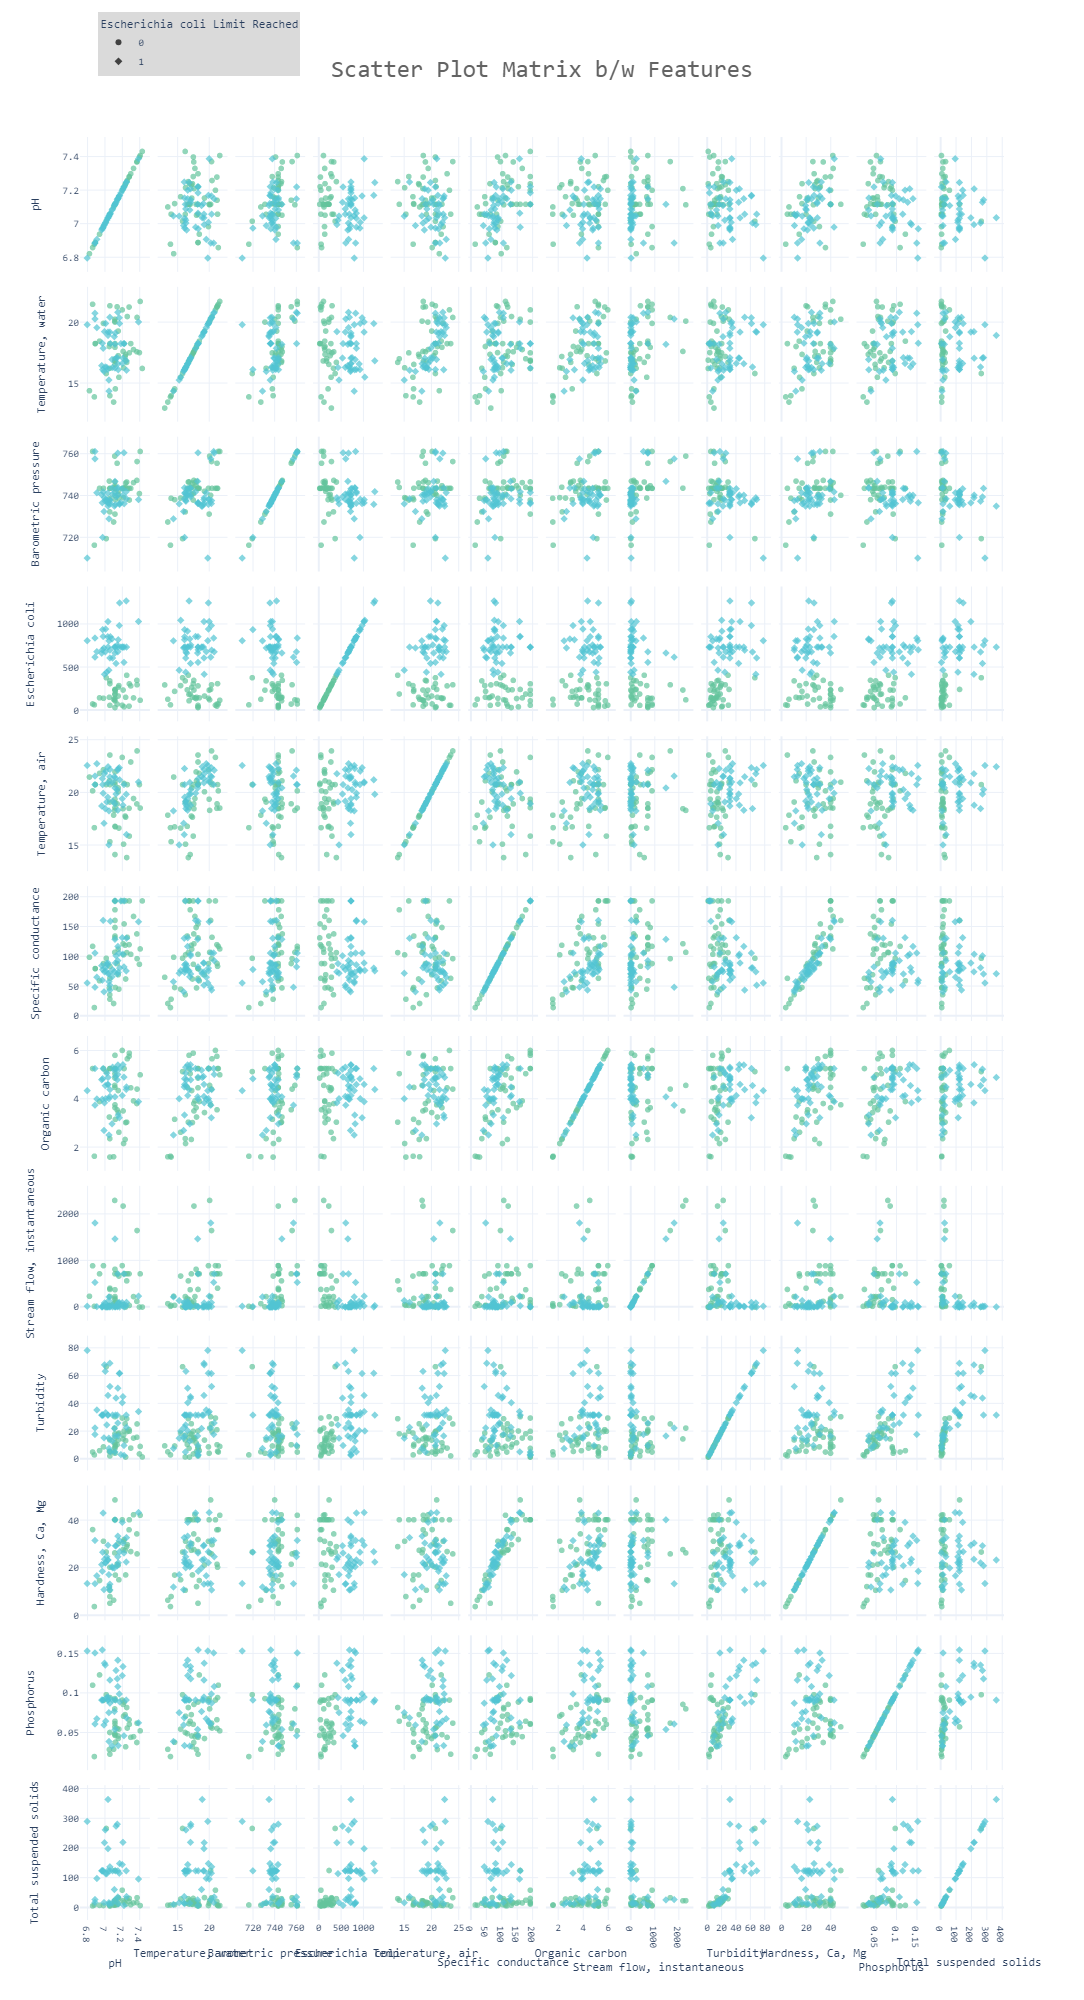

In [19]:
fig = px.scatter_matrix(df, df.drop('Escherichia coli Limit Reached',axis=1), height=2000,width=1750, template='plotly_white', opacity=0.7,
                        color_discrete_sequence=[colors_blue[3],colors_green[3]],color='Escherichia coli Limit Reached',
                       symbol='Escherichia coli Limit Reached',color_continuous_scale=[colors_green[3],colors_blue[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

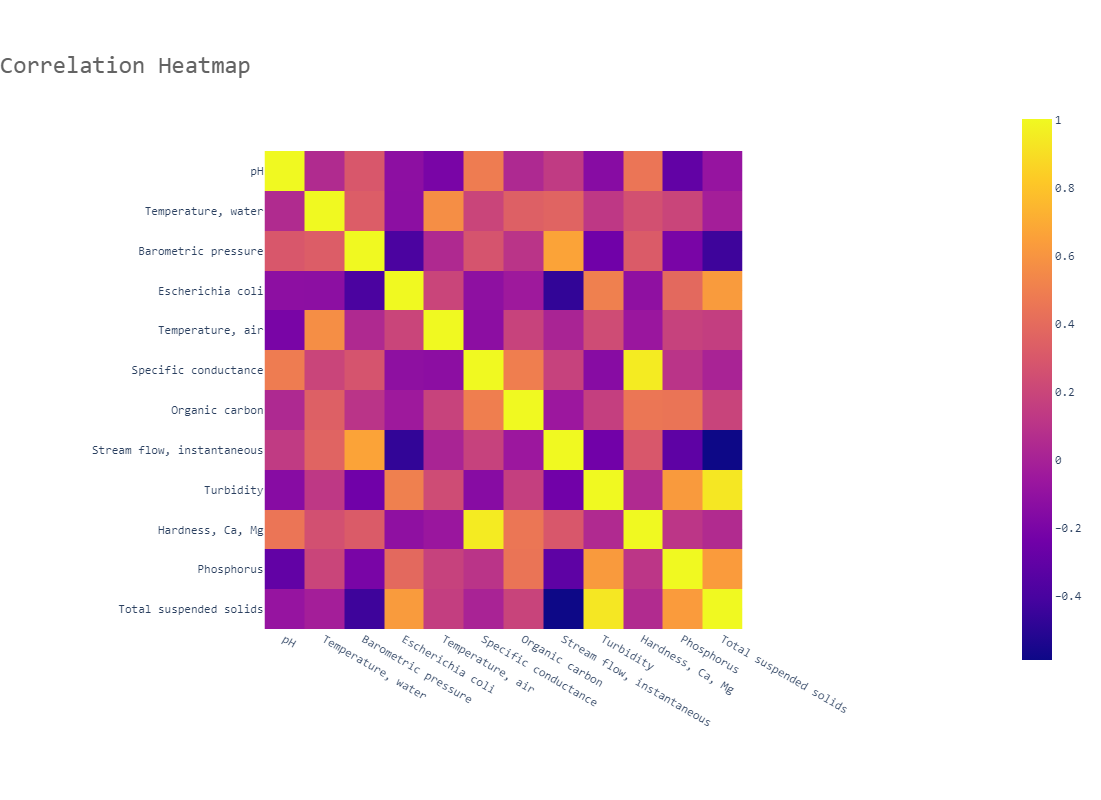

In [20]:
fig = px.imshow(cor,height=800,width=800,template='plotly_white')

fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.,y=0.93,
                             font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

## Strongly Correlated ## ( > .6 )

Specific Conductance and pH 0.66

Hardness and pH             0.64

Pressure and Stream Flow    0.64

Ecoli and Total Solids      0.63

Conductance and Hardness    0.87

Turbidity and Solids        0.84

Turbidity and Phosphorus    0.60

Solids and Phosphorus       0.67

## Correlated ## ( > .5 )

Air Temp and Water Temp     0.54

Stream Flow and Solids     -0.55

## Weakly Correlated ## ( > .4 )

Pressure and ecoli         -0.47

Stream Flow and ecoli      -0.47

Pressure and Water Temp     0.40

Carbon and Phosphorus       0.47

Carbon and Hardness         0.48

Carbon and Conductance      0.44

Solids and Pressure        -0.46


You would think that the strongest correlation would be Air temp and Water Temp, but there are features with stronger correlations then those! There are no inversely strong correlations. The features without strong correlations are water temp, air temp, and carbon. 

In [23]:
df.to_csv('output2.csv')